In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
df = pd.read_csv('loan.csv', sep=',')
df.head()

C:\Users\akhil\AppData\Local\Temp/ipykernel_3916/174641395.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv', sep=',')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [22]:
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [23]:
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [24]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [6]:
#removing null columns from data
df.dropna(axis = 1, how = 'all', inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [25]:
## find the missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [26]:
missing_value_df

,column_name,percent_missing
id,id,0.000000
member_id,member_id,0.000000
loan_amnt,loan_amnt,0.000000
funded_amnt,funded_amnt,0.000000
funded_amnt_inv,funded_amnt_inv,0.000000
...,...,...
tax_liens,tax_liens,0.098195
tot_hi_cred_lim,tot_hi_cred_lim,100.000000
total_bal_ex_mort,total_bal_ex_mort,100.000000
total_bc_limit,total_bc_limit,100.000000


In [27]:
## filter the column with greater than 3% null values
df_v1 = missing_value_df[missing_value_df['percent_missing']<3]

In [29]:
## Create new df with less than columns having less thant 3% null values
col = df_v1.index
df = df[col]

In [30]:
df.shape

(39717, 52)

In [32]:
#columns which are irrelevant for us in analysis
#print(df.columns)
df.drop(['id', 'member_id', 'url', 'title','zip_code', 'addr_state','total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'chargeoff_within_12_mths', 'pymnt_plan', 'tax_liens', 'collections_12_mths_ex_med', 'pub_rec_bankruptcies'], axis = 1, inplace = True)

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5863.155187,5833.84,5000.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.710000,1008.71,456.46,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.666844,3005.67,2400.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.890000,12231.89,10000.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.330000,3513.33,2475.94,May-16,67.79,May-16,1,INDIVIDUAL,0,0


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,15000.00000,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,15000.00000,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,14400.00000,3.500000e+04
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,430.78000,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,82300.00000,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,18.60000,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.00000,1.100000e+01
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.000000,1.00000,8.000000e+00
open_acc,39717.0,9.294408,4.400282,2.00,6.00,9.000000,12.00000,4.400000e+01
pub_rec,39717.0,0.055065,0.237200,0.00,0.00,0.000000,0.00000,4.000000e+00


In [34]:
df.shape

(39717, 37)

In [35]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [36]:
df = df[df.loan_status != 'Current']

In [37]:
### convert categorical variable to numerical variable
laonstatus = {'Fully Paid':0,'Charged Off':1}
df['loan_status']=df['loan_status'].map(laonstatus)

C:\Users\akhil\AppData\Local\Temp/ipykernel_3916/4271772864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_status']=df['loan_status'].map(laonstatus)


In [38]:
df['loan_status'].value_counts()

loan_status
0    32950
1     5627
Name: count, dtype: int64

In [39]:
(df.isna().sum()/len(df.index))*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
delinq_2yrs            0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_bal              0.000000
revol_util             0.129611
total_acc              0.000000
initial_list_status    0.000000
out_prncp              0.000000
out_prncp_inv          0.000000
total_pymnt            0.000000
total_pymnt_inv        0.000000
total_rec_prncp        0.000000
last_pymnt_d           0.184047
last_pym

In [40]:
df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)
df.emp_length.isna().sum()

C:\Users\akhil\AppData\Local\Temp/ipykernel_3916/402250431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)


0

In [41]:
df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
df.revol_util.isna().sum()

C:\Users\akhil\AppData\Local\Temp/ipykernel_3916/3238308387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)


0

In [42]:
df.revol_util = pd.to_numeric(df.revol_util.apply(lambda x : x.split('%')[0]))
df.int_rate = pd.to_numeric(df.int_rate.apply(lambda x : x.split('%')[0]))
df.emp_length = pd.to_numeric(df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
df.head()

C:\Users\akhil\AppData\Local\Temp/ipykernel_3916/2162309543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.revol_util = pd.to_numeric(df.revol_util.apply(lambda x : x.split('%')[0]))
C:\Users\akhil\AppData\Local\Temp/ipykernel_3916/2162309543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.int_rate = pd.to_numeric(df.int_rate.apply(lambda x : x.split('%')[0]))
C:\Users\akhil\AppData\Local\Temp/ipykernel_3916/2162309543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,5863.155187,5833.84,5000.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,1008.710000,1008.71,456.46,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,3005.666844,3005.67,2400.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,12231.890000,12231.89,10000.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,5632.210000,5632.21,5000.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0


{'whiskers': [<matplotlib.lines.Line2D at 0x1bfe29e1eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bfe2b1f430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bfe29e1c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1bfe2b1f970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bfe2b1fc40>],
 'means': []}

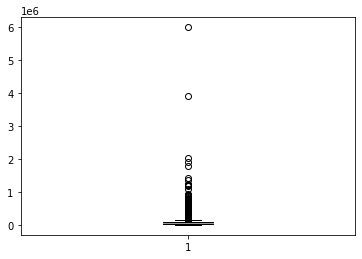

In [43]:
plot.boxplot(df.annual_inc)

In [44]:
quantile = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [45]:
#only considering quantile values which are less 0.95
value_quant_at_95 = df.annual_inc.quantile(0.95)
df = df[df.annual_inc <= value_quant_at_95]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3b96d8d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3b96e9310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3b96d8a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe3b96e98b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3b96e9b80>],
 'means': []}

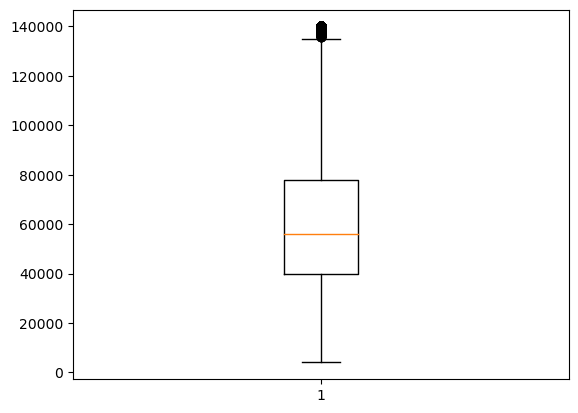

In [19]:
plot.boxplot(df.annual_inc)

<h1>Checking all the other possible outliers</h1>

{'whiskers': [<matplotlib.lines.Line2D at 0x1bfe2c27340>,
 'caps': [<matplotlib.lines.Line2D at 0x1bfe2c27880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bfe2c270a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bfe2c27dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bfe2a010a0>],
 'means': []}

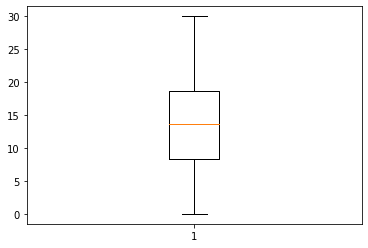

In [46]:
plot.boxplot(df.dti)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bfe2a68070>,
 'caps': [<matplotlib.lines.Line2D at 0x1bfe2a685b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bfe2a59d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1bfe2a68af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bfe2a68d90>],
 'means': []}

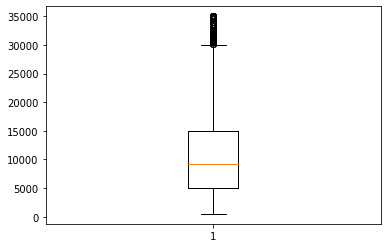

In [47]:
plot.boxplot(df.loan_amnt)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bfe2ad0e20>,
 'caps': [<matplotlib.lines.Line2D at 0x1bfe2ae13a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bfe2ad0be0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bfe2ae18e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bfe2ae1b80>],
 'means': []}

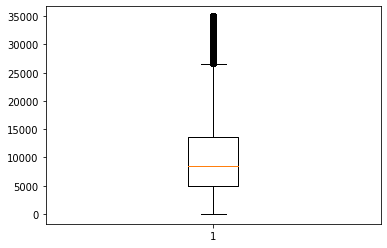

In [48]:
plot.boxplot(df.funded_amnt_inv)

<h2>Visualzing Categorically</h2>

<Axes: xlabel='loan_status', ylabel='count'>

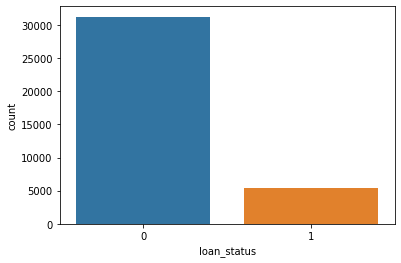

In [49]:
sns.countplot(x = 'loan_status', data=df)

In [24]:
df.home_ownership.replace(to_replace = ['NONE'],value='OTHER',inplace = True)
print(df.home_ownership.unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER']


<Axes: xlabel='home_ownership', ylabel='count'>

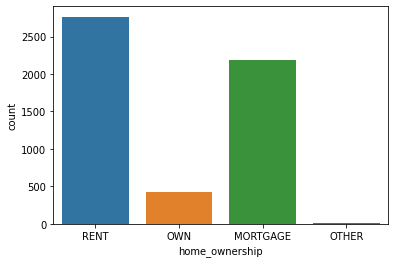

In [52]:
sns.countplot(x='home_ownership', data=df[df.loan_status==1])


<Axes: xlabel='emp_length', ylabel='count'>

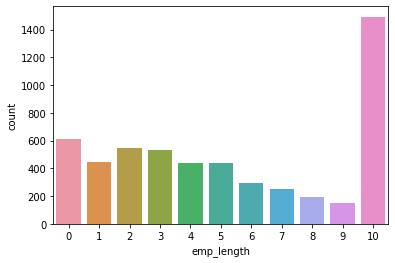

In [54]:
sns.countplot(x='emp_length', data=df[df.loan_status==1])


In [55]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

<Axes: xlabel='purpose'>

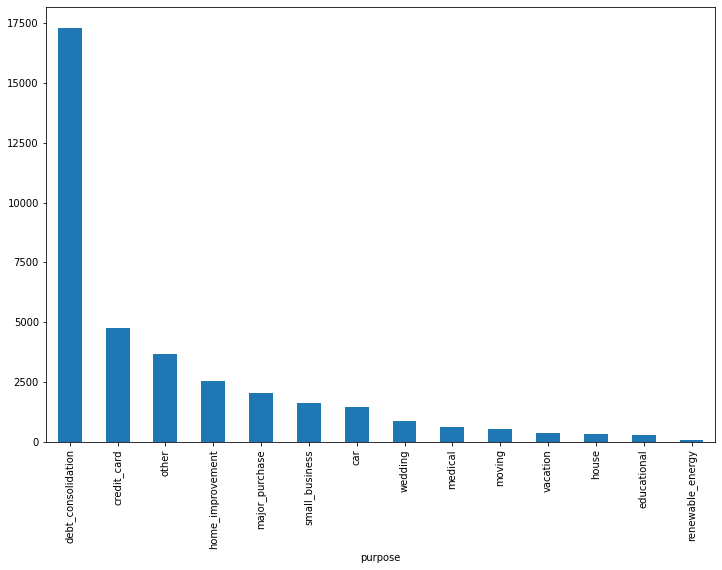

In [56]:
fig, ax = plot.subplots(figsize = (12,8))
df.purpose.value_counts().plot(kind = 'bar', ax = ax)

<Axes: xlabel='verification_status', ylabel='count'>

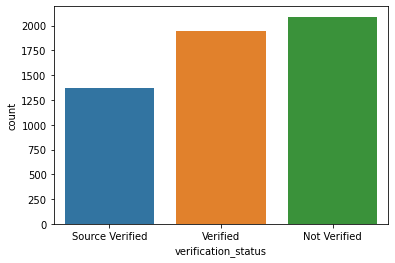

In [57]:
sns.countplot(x = 'verification_status', data=df[df.loan_status == 1])

<Axes: xlabel='term'>

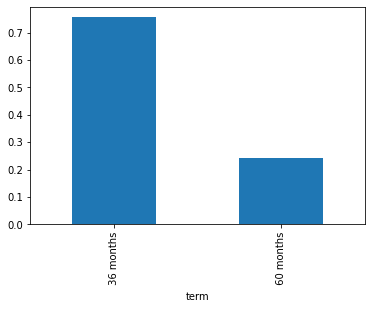

In [58]:
(df.term.value_counts()/len(df)).plot.bar()

(array([ 690., 1688., 2430., 2458., 3314., 3003., 2420., 2515., 2116.,
        2707., 1953., 1818., 1238., 1069., 1275., 1098.,  703.,  571.,
         508.,  488.,  577.,  281.,  183.,  219.,  346.,  257.,  260.,
         122.,   81.,   46.,   24.,   12.,   22.,   42.,   17.,   14.,
          10.,   12.,   15.,    4.]),
 array([  15.69  ,   47.9275,   80.165 ,  112.4025,  144.64  ,  176.8775,
         209.115 ,  241.3525,  273.59  ,  305.8275,  338.065 ,  370.3025,
         402.54  ,  434.7775,  467.015 ,  499.2525,  531.49  ,  563.7275,
         595.965 ,  628.2025,  660.44  ,  692.6775,  724.915 ,  757.1525,
         789.39  ,  821.6275,  853.865 ,  886.1025,  918.34  ,  950.5775,
         982.815 , 1015.0525, 1047.29  , 1079.5275, 1111.765 , 1144.0025,
        1176.24  , 1208.4775, 1240.715 , 1272.9525, 1305.19  ]),
 <BarContainer object of 40 artists>)

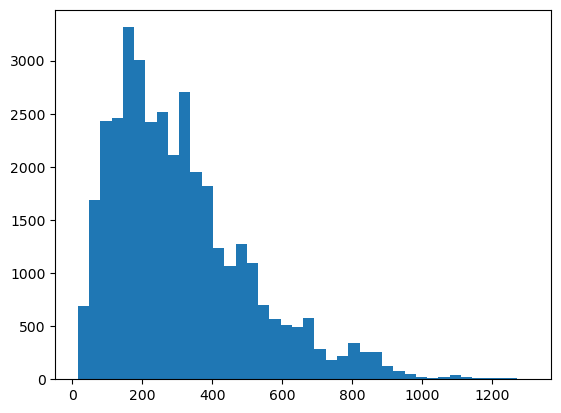

In [33]:
plot.hist(df.installment, bins=40)

## Derived columns

In [59]:
df.last_pymnt_d= pd.to_datetime(df.last_pymnt_d,format='%b-%y')
df.last_credit_pull_d= pd.to_datetime(df.last_credit_pull_d,format='%b-%y')
df.issue_d= pd.to_datetime(df.issue_d,format='%b-%y')

In [65]:
# Adding new features by getting month and year from issue_d,last_pymnt_d and last_credit_pull_d columns
df['issue_d_year'] = pd.DatetimeIndex(df['issue_d']).year  
df['issue_d_month'] = pd.DatetimeIndex(df['issue_d']).month 
 

In [67]:
df[['issue_d_year','issue_d_month']].head()

,issue_d_year,issue_d_month
0,2011,12
1,2011,12
2,2011,12
3,2011,12
5,2011,12


## Split categorical and numerical columns

In [68]:
col = df.columns
col

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt', 'issue_d_year', 'issue_d_month',
       'last_pymnt_d_year', 'last_pymnt_d_month', 'last_credit_pull_d_year',
       'last_credit_pull_d_month'],
      dtype='object')

In [69]:
col1= df.dtypes

In [70]:
df_categorical = df[col[col1=='object']]

In [72]:
df_categorical.head()

,term,grade,sub_grade,home_ownership,verification_status,purpose,earliest_cr_line,initial_list_status,application_type
0,36 months,B,B2,RENT,Verified,credit_card,Jan-85,f,INDIVIDUAL
1,60 months,C,C4,RENT,Source Verified,car,Apr-99,f,INDIVIDUAL
2,36 months,C,C5,RENT,Not Verified,small_business,Nov-01,f,INDIVIDUAL
3,36 months,C,C1,RENT,Source Verified,other,Feb-96,f,INDIVIDUAL
5,36 months,A,A4,RENT,Source Verified,wedding,Nov-04,f,INDIVIDUAL


In [73]:
df_numerical = df[col[col1!='object']]

df_numerical.head()

## Find correlation

In [85]:
loan_correlation=df_numerical[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','emp_length','annual_inc','dti','total_pymnt']]
loan_correlation.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,annual_inc,dti,total_pymnt
loan_amnt,1.000000,0.981919,0.936941,0.292707,0.131205,0.402568,0.089848,0.876585
funded_amnt,0.981919,1.000000,0.954896,0.297700,0.130888,0.398396,0.089040,0.893251
funded_amnt_inv,0.936941,0.954896,1.000000,0.290425,0.144124,0.381785,0.096596,0.868727
int_rate,0.292707,0.297700,0.290425,1.000000,-0.013769,0.055497,0.112344,0.281607
emp_length,0.131205,0.130888,0.144124,-0.013769,1.000000,0.160473,0.052603,0.113357
annual_inc,0.402568,0.398396,0.381785,0.055497,0.160473,1.000000,-0.073368,0.381527
dti,0.089848,0.089040,0.096596,0.112344,0.052603,-0.073368,1.000000,0.085813
total_pymnt,0.876585,0.893251,0.868727,0.281607,0.113357,0.381527,0.085813,1.000000


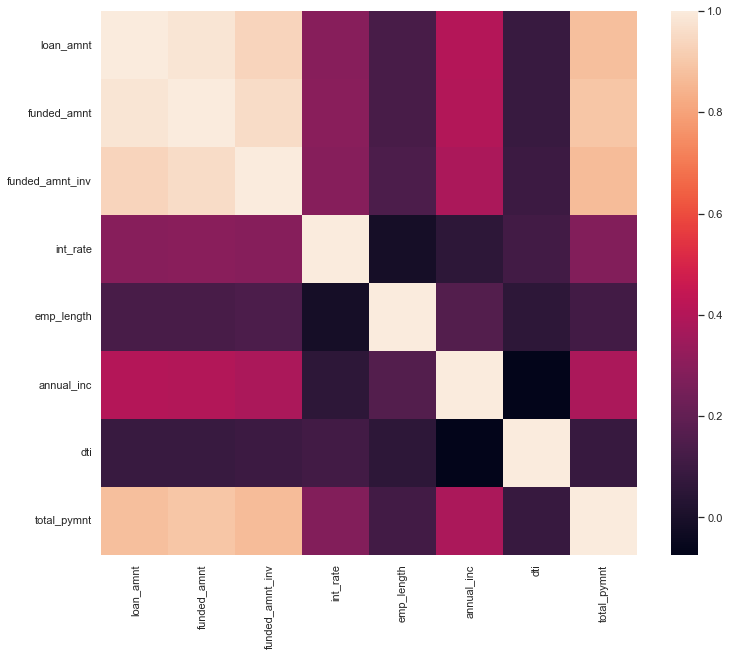

In [86]:
# correlation and using heatmap to visualise it.
sns.set(rc={'figure.figsize':(12,10)})
sns.set_style('whitegrid')
# Heatmap
sns.heatmap(loan_correlation.corr())
plot.show()

## Observations -

Annual Income to dti Ratio are negatively correlated
Loan Amount,Investor Amount and Funding Amount are strongly correlated
Positive correlation between Annual Income and emp_lenght


C:\Users\akhil\AppData\Local\Temp/ipykernel_3916/1980910889.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df['loan_amnt'],rug=True)


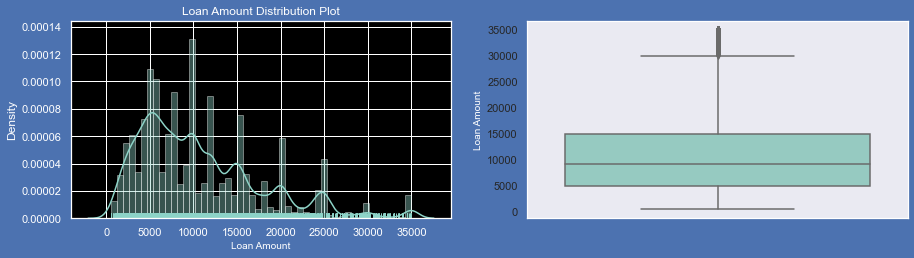

In [80]:
with plot.style.context('dark_background'):
  plot.figure(figsize=(15,8),facecolor='b')
  
  #Subplot 1

  plot.subplot(2,2,1)
  ax=sns.distplot(df['loan_amnt'],rug=True)
  ax.set(title='Loan Amount Distribution Plot')
  ax.set_xlabel('Loan Amount', fontsize=10,color='w')

  #Subplot 2
  sns.set_style("dark")

  plot.subplot(2,2,2)
  ax=sns.boxplot(y=df['loan_amnt'])
  ax.set_ylabel('Loan Amount', fontsize=10,color='w')
  plot.show()

###### Observations -
Most of the loan amounts are in the range 5000-15000

C:\Users\akhil\AppData\Local\Temp/ipykernel_3916/4240126525.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df['annual_inc'],rug=True)


Text(0, 0.5, 'Annual Income')

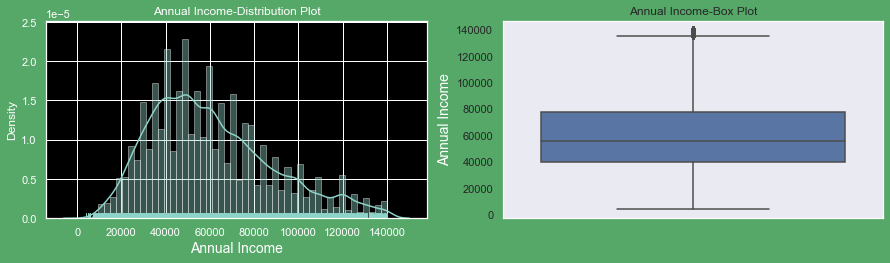

In [81]:
plot.figure(figsize=(15,8),facecolor='g')

with plot.style.context('dark_background'):
  #Subplot1
  plot.subplot(2,2,1)
  ax=sns.distplot(df['annual_inc'],rug=True)
  ax.set(title='Annual Income-Distribution Plot')
  ax.set_xlabel('Annual Income',fontsize=14,color='w')

#Subplot2
sns.set_style("dark")
plot.subplot(2,2,2)
ax=sns.boxplot(y=df['annual_inc'])
ax.set(title='Annual Income-Box Plot')
ax.set_ylabel('Annual Income',fontsize=14,color='w')

## observation
Median income is between 55K-60K.

In [91]:
##1: Charged of 0: fully paid
purpose_vs_loan = df.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total']=purpose_vs_loan[1]+purpose_vs_loan[0]
purpose_vs_loan['ChargedOff_Proportion']=purpose_vs_loan[1]/purpose_vs_loan['Total']
purpose_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,purpose,0,1,Total,ChargedOff_Proportion
11,small_business,1168,454,1622,0.279901
10,renewable_energy,77,18,95,0.189474
3,educational,255,54,309,0.174757
8,moving,458,90,548,0.164234
9,other,3085,601,3686,0.163049
5,house,283,55,338,0.162722
7,medical,536,103,639,0.161189
2,debt_consolidation,14621,2672,17293,0.154513
12,vacation,312,52,364,0.142857
4,home_improvement,2232,319,2551,0.125049


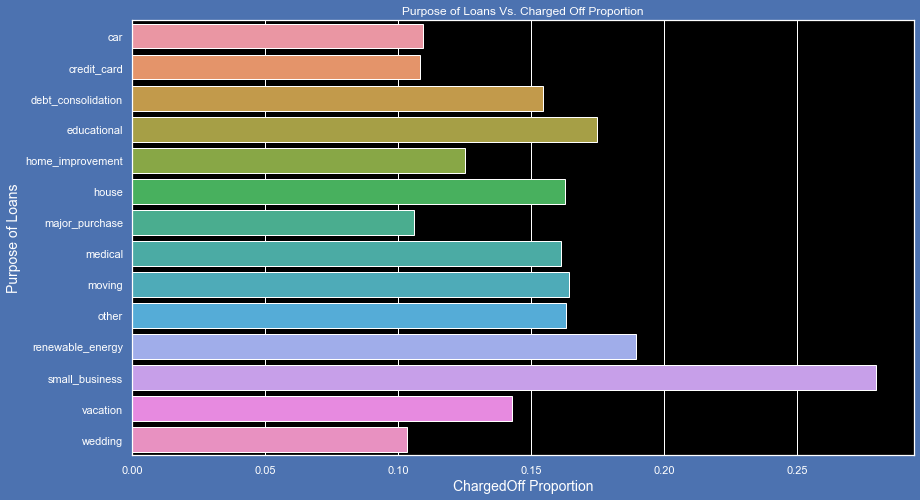

In [92]:
#Drawing Bar Charts from above data

with plot.style.context('dark_background'):
  fig,ax1=plot.subplots(figsize=(14,8),facecolor='b')
  ax1.set(title='Purpose of Loans Vs. Charged Off Proportion')
  ax1=sns.barplot(y='purpose',x='ChargedOff_Proportion',data=purpose_vs_loan)
  ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
  ax1.set_xlabel('ChargedOff Proportion',fontsize=14,color='w')

## Observation
most of the loan taken for small business have chance to be default
